# Data Manipulation Libraries

In [1]:
import numpy as np
import pandas as pd

# Data Visualization Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# Data

In [4]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep = '\t', names = col_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


### Getting the movie titles

In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging the two datasets

In [7]:
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Exploratory Data Analysis

In [8]:
# Setting the default seaborn style
sns.set()

### Ratings

#### Creating a ratings dataframe with average rating and number of ratings

In [15]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [16]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [18]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### Histogram of Number of Ratings

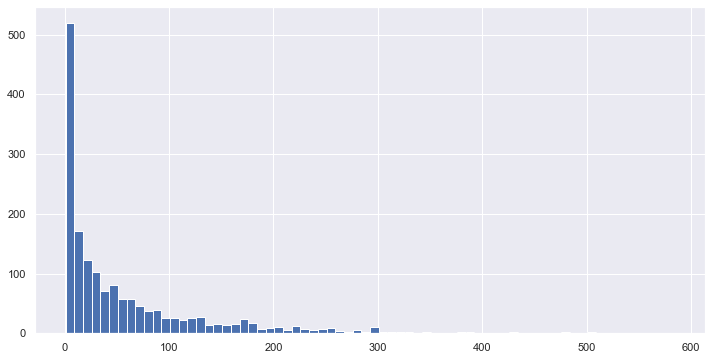

In [20]:
plt.figure(figsize=(12,6))
ratings['num_of_ratings'].hist(bins=70)

We can see that most of the movies lies between 0 to 100 number of reviews.

#### Histogram of Ratings

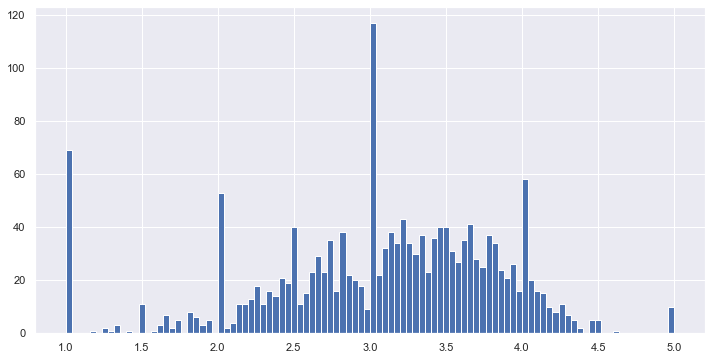

In [25]:
plt.figure(figsize=(12,6))
ratings['rating'].hist(bins=100)

Most of the movies are rated between 2.0 to 4.0 with spikes at integer values, indicating that most of the people rate in integer values.

#### Jointplot of ratings and number of ratings

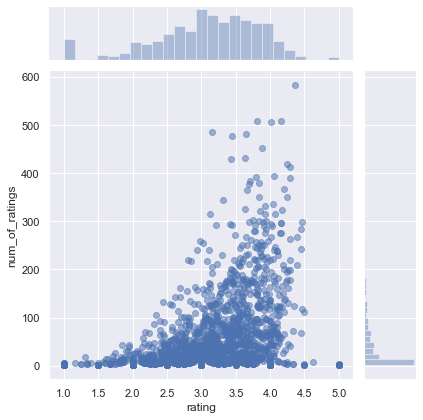

In [26]:
sns.jointplot(x='rating', y='num_of_ratings', data=ratings, alpha = 0.5)

We can see that there is a general trend that rating increases with number of ratings.

# Recommender System

I will now create a basic recommender system.

I will now create a matrix with user ids on one axis and movie titles on another axis. In this matrix, each cell will consist of ratings given by a particular user to particular movie. Now keep in mind as most people haven't seen most of the movies, so there will be many NaN values, as a particular user may have not watched a particular movie and so he or she haven't rated that movie.

In [27]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movies:

In [28]:
ratings.sort_values('num_of_ratings', ascending=False).head(20)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two movies: Contact and Toy Story.
Grab the user ratings of these two movies.

In [29]:
contact_user_ratings = moviemat['Contact (1997)']
toystory_user_ratings = moviemat['Toy Story (1995)']

In [30]:
contact_user_ratings.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [31]:
toystory_user_ratings.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

We will now use corrwith() method to get the correlations between two pandas series:

In [35]:
similar_to_contact = moviemat.corrwith(contact_user_ratings)
similar_to_toystory = moviemat.corrwith(toystory_user_ratings)

Let's clean this by removing NaN values and using a DataFrame instead of a Series:

In [33]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


Now if we sort the dataframe with respect to correlation, we will get the most similar movies. But please note we may get some results which will not make any sense as there are a lot of movies only watched once by users who also watched contact.

In [34]:
corr_contact.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Lamerica (1994),1.0
Faust (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0


To further improve our recommendations, let's filter out the movies which have reviews less tha 100. 100 is chosen off by the earlier histogram of number of ratings.

In [36]:
corr_contact = corr_contact.join(ratings['num_of_ratings'])
corr_contact[corr_contact['num_of_ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num_of_ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136


We have got the movies most similar to movie Contact (1997), and yes it is most similar to itself that's why on the top position.

Let's repeat the same for the movie ToyStory (1995).

In [37]:
corr_toystory = pd.DataFrame(similar_to_toystory, columns=['Correlation'])
corr_toystory.dropna(inplace=True)
corr_toystory = corr_toystory.join(ratings['num_of_ratings'])
corr_toystory[corr_toystory['num_of_ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,num_of_ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175


# Thank You